#Assignment 3

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# NLP
import nltk
from nltk.corpus import gutenberg
import numpy as np
import pandas as pd

# Visualization
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from random import choice


from sklearn.metrics import cohen_kappa_score

from scipy import ndimage 
from sklearn.manifold import TSNE
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics.pairwise import euclidean_distances
from gensim.models.doc2vec import Doc2Vec
from scipy import sparse
import pylab

# Remove warning from the cells output
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
# Word Cloud
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Convert the data of the books to csv file using pandas using to_df function

In [ ]:
import pandas as pd

def to_df(books): 
  df = pd.DataFrame.from_dict(books) 
  df.to_csv (r'test8.csv', index = False, header=True)

  return df

In [ ]:
import nltk
from nltk.corpus import gutenberg

nltk.download("gutenberg")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [ ]:
from nltk.corpus import gutenberg 
import pandas as pd

files_en = gutenberg.fileids()
selected_titles = ['austen-emma.txt','bible-kjv.txt','chesterton-brown.txt','shakespeare-caesar.txt','blake-poems.txt']

text_1 = gutenberg.open('austen-emma.txt').read()
text_2 = gutenberg.open('bible-kjv.txt').read()
text_3 = gutenberg.open('chesterton-brown.txt').read()
text_4 = gutenberg.open('shakespeare-caesar.txt').read()
text_5 = gutenberg.open('blake-poems.txt').read()
text = [text_1, text_2, text_3, text_4, text_5]

name = ['austen-emma', 'bible', 'chesterton-brown', 'shakespeare-caesar', 'blake-poems']

data = {'Title': name,
        'Text': text
        }

books = pd.DataFrame(data)

## Print the dataframe


In [ ]:
df = to_df(books)

In [ ]:
df

,Title,Text
0,austen-emma,[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAP...
1,bible,[The King James Bible]\n\nThe Old Testament of...
2,chesterton-brown,[The Wisdom of Father Brown by G. K. Chesterto...
3,shakespeare-caesar,[The Tragedie of Julius Caesar by William Shak...
4,blake-poems,[Poems by William Blake 1789]\n\n \nSONGS OF I...


In [ ]:
# print the length of the first book  
len(df.Text[0])

887071

In [ ]:
# print the length of the second book  
len(df.Text[1])

4332554

In [ ]:
df

,Title,Text
0,austen-emma,[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAP...
1,bible,[The King James Bible]\n\nThe Old Testament of...
2,chesterton-brown,[The Wisdom of Father Brown by G. K. Chesterto...
3,shakespeare-caesar,[The Tragedie of Julius Caesar by William Shak...
4,blake-poems,[Poems by William Blake 1789]\n\n \nSONGS OF I...


##Data preprocessing
#### Convert text to lower case to make it east to search for words


In [ ]:
def to_lower(data):
    data = [word.lower() for word in data]
    return data

df['Text'] = to_lower(df['Text'])

#### Remove Numbers and tokenize the text into words


In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[^\d\W]+')
df['cleaned'] = [tokenizer.tokenize(item) for item in df['Text']]

In [ ]:
df['cleaned']

0    [emma, by, jane, austen, volume, i, chapter, i...
1    [the, king, james, bible, the, old, testament,...
2    [the, wisdom, of, father, brown, by, g, k, che...
3    [the, tragedie, of, julius, caesar, by, willia...
4    [poems, by, william, blake, songs, of, innocen...
Name: cleaned, dtype: object

In [ ]:
stop = ["i","me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 'text-align:', "justify;" ,'text-justify:',"font-weight:",'margin-top:', 'text-indent:','margin-bottom:','margin-left:','margin-right:','text-align:',"yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "ebook","font","project" ,"size", "small", "align", "text","position", "border", "solid", "position","75em","left","right","bottom", "center","body","up", "chapter", "projec","auto","vertical","gutenberg","text","align" ,"margin","weight","indent","width", "break","style","page","line","height","spacing","normal","same", "so", "could", "could", "justify","have", "has","than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [ ]:
df['cleaned'][0]

['emma',
 'by',
 'jane',
 'austen',
 'volume',
 'i',
 'chapter',
 'i',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 'she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 's',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 'her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'had',
 'been'

In [ ]:
df['cleaned']  = df['cleaned'].apply(lambda x: ([word for word in x if word not in (stop)]))

In [ ]:
df['cleaned']

0    [emma, jane, austen, volume, emma, woodhouse, ...
1    [king, james, bible, old, testament, king, jam...
2    [wisdom, father, brown, g, k, chesterton, abse...
3    [tragedie, julius, caesar, william, shakespear...
4    [poems, william, blake, songs, innocence, expe...
Name: cleaned, dtype: object

### Remove single char, and char with size 2

In [ ]:
def notT(text):
    text = text.apply(lambda x: [item for item in x if len(item)>3])
    return text
df['cleaned']= notT(df['cleaned'])


In [ ]:
df["Author"]=df["Title"]
df["Title"]=['a','b','c','d','e']
df.rename(columns = {'Title':'Label'}, inplace = True)
df

,Label,Text,cleaned,Author
0,a,[emma by jane austen 1816]\n\nvolume i\n\nchap...,"[emma, jane, austen, volume, emma, woodhouse, ...",austen-emma
1,b,[the king james bible]\n\nthe old testament of...,"[king, james, bible, testament, king, james, b...",bible
2,c,[the wisdom of father brown by g. k. chesterto...,"[wisdom, father, brown, chesterton, absence, g...",chesterton-brown
3,d,[the tragedie of julius caesar by william shak...,"[tragedie, julius, caesar, william, shakespear...",shakespeare-caesar
4,e,[poems by william blake 1789]\n\n \nsongs of i...,"[poems, william, blake, songs, innocence, expe...",blake-poems


###Cleaned dataframe

In [ ]:
df_cleaned = df [['Label', 'cleaned', 'Author']] 

In [ ]:
df_cleaned

,Label,cleaned,Author
0,a,"[emma, jane, austen, volume, emma, woodhouse, ...",austen-emma
1,b,"[king, james, bible, testament, king, james, b...",bible
2,c,"[wisdom, father, brown, chesterton, absence, g...",chesterton-brown
3,d,"[tragedie, julius, caesar, william, shakespear...",shakespeare-caesar
4,e,"[poems, william, blake, songs, innocence, expe...",blake-poems


### Function that create 200 partions of 150 Words for each book

In [ ]:
import random 

n = 150 # number of words in the partition
def partitions(data):
  
  data['patrs'] = data['cleaned'] 
  data['partt'] = data['patrs']
  for j in range(len(data['cleaned'])):
      data['patrs'][j] = [data['patrs'][j][i:i + n] for i in range(0, len(data['patrs'][j]), n)] # create lists of 150 words
      data['partt'][j] = random.choices(data['patrs'][j],k = 200) # create 200 partitions

 
  split_df = pd.DataFrame(data['partt'].values.tolist())
  # split_df.set_index(data['Title'], inplace = True)
  # split_df= split_df.T
  split_df['Label'] = data['Label']
  split_df['Author'] = data['Author']

  return split_df

### Apply the function to split the data into partitions of words

In [ ]:
booksPartions_df = partitions(df_cleaned)
booksPartions_df


,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,Label,Author
0,"[girl, birth, belonged, highbury, three, years...","[least, three, months, cared, nothing, believe...","[remarkably, elegant, gown, surprized, fallen,...","[girl, birth, belonged, highbury, three, years...","[perry, upon, watch, went, much, something, th...","[blunders, post, done, thing, must, speak, unc...","[would, disappointment, father, altogether, kn...","[engagements, without, difficulty, without, co...","[complying, dreaded, quarrelsome, heroism, rea...","[gainer, well, said, emma, willing, pass, want...",...,"[live, make, addition, jane, fairfax, time, le...","[trying, understand, degree, agitation, rather...","[give, music, shall, take, carpet, work, objec...","[though, well, know, likewise, brotherly, affe...","[meet, friend, gone, next, moment, another, mo...","[follow, lead, take, lead, propriety, require,...","[come, dine, whenever, asked, would, poor, fel...","[indeed, replied, dear, isabella, extraordinar...",a,austen-emma
1,"[servant, lodge, within, jerusalem, night, gua...","[hireling, shepherd, whose, sheep, seeth, wolf...","[bullock, offering, goat, offering, whose, blo...","[delight, good, afflicted, might, learn, statu...","[like, purple, king, held, galleries, fair, pl...","[possess, land, shall, inherit, holy, mountain...","[bracelets, upon, hands, beautiful, crowns, up...","[took, burnt, offering, sacrifices, aaron, cam...","[elkanah, sons, elkanah, zophai, nahath, eliab...","[abraham, seed, shall, kindreds, earth, blesse...",...,"[keep, thou, breaker, circumcision, made, unci...","[lovest, thou, said, unto, lord, thou, knowest...","[upon, evil, arrows, famine, shall, destructio...","[earth, joseph, father, laid, hand, upon, head...","[came, shewed, spake, harm, thee, desire, hear...","[chance, thee, tree, ground, whether, young, o...","[shall, give, thee, light, walk, circumspectly...","[hidden, almighty, know, days, remove, landmar...",b,bible
2,"[reverend, gentleman, rapidity, didn, found, f...","[pale, might, chryselephantine, made, like, gr...","[literal, truth, flambeau, father, brown, ofte...","[husband, sitting, dining, room, reading, book...","[faint, refined, smile, seemed, pass, seymour,...","[face, goes, reddish, colouring, roman, nose, ...","[officer, surprised, pained, negro, away, enou...","[said, governor, tree, know, asked, father, br...","[unjust, gentlemen, duke, really, feel, bitter...","[treated, gate, fancies, monstrosities, thousa...",...,"[table, cloth, went, look, knew, snobbery, wel...","[giving, impression, larger, perhaps, artifici...","[giving, impression, larger, perhaps, artifici...","[allowed, touch, brown, dressing, gown, rope, ...","[slightly, diminished, came, nearly, made, tur...","[since, able, check, substance, proclamation, ...","[yellow, head, broom, gorse, garden, rapped, g...","[treated, gate, fancies, monstrosities, thousa...",c,chesterton-brown
3,"[begg, stay, home, deci, dreame, amisse, inter...","[crests, like, deceitfull, iades, sinke, trial...","[good, messala, messa, dyed, master, strato, s...","[growne, quick, mettle, went, schoole, cassi, ...","[noble, caesar, caes, prepare, within, blame, ...","[good, messala, messa, dyed, master, strato, s...","[alarums, enter, cassius, titinius, cassi, loo...","[caesar, addrest, presse, neere, second, caska...","[sacrifice, bring, opinions, successe, lord, e...","[good, messala, messa, dyed, master, strato, s...",...,"[noble, brutus, gods, stand, friendly, louers,...","[sennit, exeunt, caesar, traine, cask, cloake,...","[perhaps, behauiours, therefore, good, friends...","[cassi, cinna, know, gate, friend, cinna, hast...","[honest, caska, haue, falling, sicknesse, cask...","[noble, cass, wrong, euery, wrong, brutus, sai...","[brut, thee, philippi, haue, taken, heart, tho...","[stoope, romans, stoope, bathe, hands, caesars...",d,shakespeare-caesar
4,"[neck, eyes, flame, ruby, tears, came, lioness...","[poems, william, blake, songs, innocence, exp

In [ ]:
booksPartions_df= booksPartions_df.melt(id_vars=["Label","Author"])
booksPartions_df = booksPartions_df.drop(labels='variable', axis=1)

In [ ]:
len(booksPartions_df.value[0])

150

In [ ]:
booksPartions_df

,Label,Author,value
0,a,austen-emma,"[girl, birth, belonged, highbury, three, years..."
1,b,bible,"[servant, lodge, within, jerusalem, night, gua..."
2,c,chesterton-brown,"[reverend, gentleman, rapidity, didn, found, f..."
3,d,shakespeare-caesar,"[begg, stay, home, deci, dreame, amisse, inter..."
4,e,blake-poems,"[neck, eyes, flame, ruby, tears, came, lioness..."
...,...,...,...
995,a,austen-emma,"[indeed, replied, dear, isabella, extraordinar..."
996,b,bible,"[hidden, almighty, know, days, remove, landmar..."
997,c,chesterton-brown,"[treated, gate, fancies, monstrosities, thousa..."
998,d,shakespeare-caesar,"[stoope, romans, stoope, bathe, hands, caesars..."


### LabelEncoder for Label Column 

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder =LabelEncoder()
booksPartions_df['Label']= label_encoder.fit_transform(booksPartions_df['Label'])
booksPartions_df.head(100)

,Label,Author,value
0,0,austen-emma,"[girl, birth, belonged, highbury, three, years..."
1,1,bible,"[servant, lodge, within, jerusalem, night, gua..."
2,2,chesterton-brown,"[reverend, gentleman, rapidity, didn, found, f..."
3,3,shakespeare-caesar,"[begg, stay, home, deci, dreame, amisse, inter..."
4,4,blake-poems,"[neck, eyes, flame, ruby, tears, came, lioness..."
...,...,...,...
95,0,austen-emma,"[miserable, sure, must, white, gown, away, kno..."
96,1,bible,"[strife, kadesh, river, toward, great, land, s..."
97,2,chesterton-brown,"[vessels, proceeded, specialist, possible, gla..."
98,3,shakespeare-caesar,"[army, stand, would, haue, parley, cassi, stan..."


###Output of dataframe

In [ ]:
books, label = booksPartions_df['value'].astype(str), booksPartions_df['Label']
label_=label
label_=label_.tolist()

## Calculate PCA Function 

In [ ]:
from sklearn.decomposition import PCA
def calc_PCA(books,_2Dtransformed_data,title,flag=0):
  if flag==0:
    count =_2Dtransformed_data.fit_transform(books).todense()
  else:
    count=_2Dtransformed_data

  pca = PCA(n_components=2)
  pca.fit(count)
  _2Dtransformed_data=pca.transform(count)
  print(title,_2Dtransformed_data.shape)
  plt.scatter(_2Dtransformed_data[:, 0], _2Dtransformed_data[:, 1])
  plt.title(title)
  return _2Dtransformed_data

## **Transformation**

### BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def bow_emb(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

X_bow_emb, count_vectorizer = bow_emb(books)

In [ ]:
ngram_vectorizer_names = count_vectorizer.get_feature_names()
feature_DF1 = pd.DataFrame(X_bow_emb.toarray(),columns = ngram_vectorizer_names)
x_bow= feature_DF1
x_bow

,_______,_adair_,_addition_,_all_,_amor_,_any_,_at_,_broke_,_compliments_,_courtship_,...,zippor,zipporah,zoar,zobah,zophai,zophar,zorobabel,zuar,zuph,zurishaddai
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


####PCA with BOW

Data Dimensions after PCA with BOW (1000, 2)


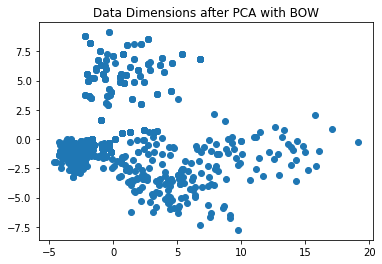

In [ ]:
BOW_2Dtransformed_data=calc_PCA(books,count_vectorizer,'Data Dimensions after PCA with BOW')

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    emb = tfidf_vectorizer.fit_transform(data)  
    features_name = tfidf_vectorizer.get_feature_names()
    return emb, tfidf_vectorizer, features_name

X_tfidf_emb, tfidf_vectorizer, names = tfidf(books)


In [ ]:
X_tfidf = pd.DataFrame(X_tfidf_emb.toarray(), columns = names)
X_tfidf

,_______,_adair_,_addition_,_all_,_amor_,_any_,_at_,_broke_,_compliments_,_courtship_,...,zippor,zipporah,zoar,zobah,zophai,zophar,zorobabel,zuar,zuph,zurishaddai
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####PCA with TF-IDF

Data Dimensions after PCA with Tf-Idf (4, 2)


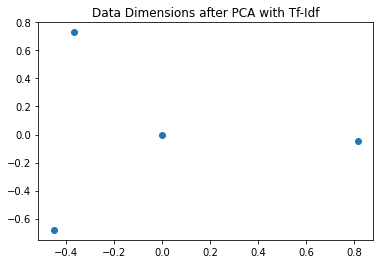

In [ ]:
tfidf_2Dtransformed_data=calc_PCA(books,tfidf_vectorizer,'Data Dimensions after PCA with Tf-Idf')

###LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

def LDA(data):

  count_vect = CountVectorizer()
  X_t = count_vect.fit_transform(data)
  lda = LatentDirichletAllocation(n_components=5,random_state=0) 
  LDA_out= lda.fit_transform(X_t)
  features_name = lda.components_
  return LDA_out,  features_name

# x_LDA = LDA(books)
x_LDA, names = LDA(books)


In [ ]:
print(x_LDA)

[[0.18274734 0.81322123 0.0013365  0.00134515 0.00134979]
 [0.70780337 0.00134291 0.2881575  0.0013532  0.00134302]
 [0.00134306 0.25022127 0.42695057 0.32011574 0.00136936]
 ...
 [0.00134194 0.00135021 0.00134104 0.0013588  0.994608  ]
 [0.00135008 0.00134499 0.6234237  0.37254601 0.00133523]
 [0.98925527 0.00268126 0.00268534 0.00269197 0.00268616]]


####PCA with LDA

Data Dimensions after PCA with LDA (1000, 2)


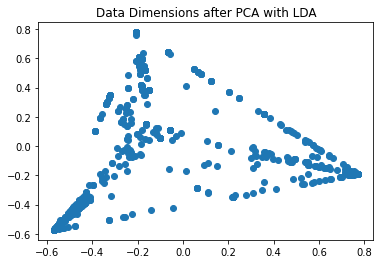

In [ ]:
LDA_2Dtransformed_data=calc_PCA(books,x_LDA,'Data Dimensions after PCA with LDA',1)

###Word Embedding

In [ ]:
# make word2vec and apply in document 
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

def word_embedding(data):
  docs = [d for d in data['value']]
  documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs)]

  vec_size = 50
  alpha = 0.025
  d2v_model = Doc2Vec(vector_size=vec_size,
                  alpha=alpha, 
                  min_alpha=0.0025,
                  min_count=1,
                  dm =1)
  d2v_model.build_vocab(documents)
  d2v_model.train(documents, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)
  d2v=d2v_model.docvecs.doctag_syn0
  return d2v

x_doc2vec = word_embedding(booksPartions_df)
x_doc2vec

array([[-0.5498313 ,  0.00510138,  0.08426986, ..., -0.09254593,
        -0.01684938,  0.05325905],
       [-0.79268634, -0.0402432 ,  0.1042955 , ..., -0.17638049,
        -0.03745943,  0.07307044],
       [-0.7014714 , -0.02094294,  0.10945188, ..., -0.13189684,
        -0.02578384,  0.06687639],
       ...,
       [-0.7097923 , -0.00712473,  0.10698897, ..., -0.14123227,
        -0.03011435,  0.0730188 ],
       [-0.68190414, -0.05286178,  0.09154068, ..., -0.14819352,
        -0.02482163,  0.07269939],
       [-0.36561382, -0.00340544,  0.05434926, ..., -0.06756338,
        -0.01737622,  0.04124581]], dtype=float32)

####PCA with word-embedding

Data Dimensions after PCA with Word2Vec (1000, 2)


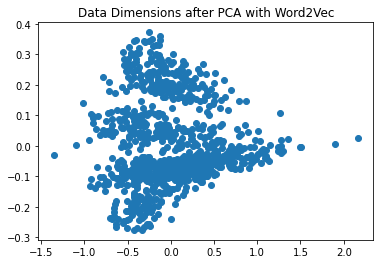

In [ ]:
result=calc_PCA(books,x_doc2vec,'Data Dimensions after PCA with Word2Vec',1)

## Exploratory functions

###Plot word cloud

In [ ]:
from collections import Counter
from wordcloud import WordCloud

def plot_word_cloud(book1):
  book1_str = [" ".join(doc) for doc in book1]
  
  #convert it to dictionary with values and its occurences
  word_could_dict=Counter(",".join(book1_str).split())
  wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

###Plot word bar

In [ ]:
def plot_word_bar(book): 

  book1_str = [" ".join(doc) for doc in book]
  
  #convert it to dictionary with values and its occurences
  word_could_dict=Counter(",".join(book1_str).split())

  plt.figure(figsize=(15,8))
  plt.bar(range(len(word_could_dict.most_common(20))), [val[1] for val in word_could_dict.most_common(20)], align='center')
  plt.xticks(range(len(word_could_dict.most_common(20))), [val[0] for val in word_could_dict.most_common(20)])
  plt.xticks(rotation=70)
  plt.title("Most Frequent Words")
  plt.xlabel("Word")
  plt.ylabel("Count")
  plt.show()

### Plot  model

In [ ]:
def plot_clusters(transform_model, cluster_model, y,title, n=5):
    # PCA for Transformation model
    pca_model = PCA(n_components=2).fit_transform(transform_model)
    
    plt.figure(figsize=(17,6))
    
    plt.subplot(1,2,1)
    for clstr in range(n):
        x_points_org = pca_model[y == clstr, 0]
        y_points_org = pca_model[y == clstr, 1]
        plt.scatter(x_points_org, y_points_org, label='Book '+str(clstr+1))
        plt.plot(np.mean(x_points_org), np.mean(y_points_org), color='yellow', marker='^', markersize=12)
    
    plt.title("Original Data")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    
    plt.subplot(1,2,2)
    for clstr in range(n):
        x_points = pca_model[cluster_model.fit_predict(pca_model) == clstr, 0]
        y_points = pca_model[cluster_model.fit_predict(pca_model) == clstr, 1]
        plt.scatter(x_points, y_points, label="Cluster "+str(clstr+1))
        plt.plot(np.mean(x_points), np.mean(y_points), color='yellow', marker='^', markersize=12)
    
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend();

##Clustering algorithms

##K-mean

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix,accuracy_score
def Kmeans_and_Evaluation(transformation_,title):
  WCSS_ = []
  silhouette_lst=[]
  lst_rnge =range(2, 9)
  best_k=2
  for i in range(2, 9):
      kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=40, random_state=7)
      kmeans.fit(transformation_)
      WCSS_.append(kmeans.inertia_)
      y_predd =kmeans.fit_predict(transformation_)
      #Mapping
      cm = confusion_matrix(label_, y_predd)
      cm_argmax = cm.argmax(axis=0)
      y_predd_ = np.array([cm_argmax[i] for i in y_predd])
      s_score = silhouette_score(transformation_, y_predd_)
      silhouette_lst.append(s_score)
      if i==2:
        bst_silh=s_score
      else:
        if bst_silh < s_score:
          bst_silh=s_score
          best_k=i


  plt.plot(range(2, 9), WCSS_)
  plt.title('Elbow '+title)
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()
  
  plt.plot(lst_rnge, silhouette_lst, label='silhouette')
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette score')
  plt.title("silhouette Evaluation")
  plt.show()  
  
  kmeans = KMeans(n_clusters=5,random_state=100)
  pred_y= kmeans.fit_predict(transformation_)
  #Mapping
  cm = confusion_matrix(label_, pred_y)
  cm_argmax = cm.argmax(axis=0)
  y_pred_ = np.array([cm_argmax[i] for i in pred_y])
  #Evaluation
  print("Kappa for the model at n_clusters=",5,"is ",round(cohen_kappa_score(y_pred_,label_),4))
  print("Best Value for n cluster is  =", best_k ,"The average silhouette_score :", round(bst_silh,4)) 
  silhouette_avg = silhouette_score(transformation_,y_pred_)
  print("For n_clusters =", 5,"The silhouette_score :",round(silhouette_avg,4)) 
  print("For n_clusters =", 5,"The homogeneity_score :", round(homogeneity_score(label_,y_pred_),4))
  print("For n_clusters =", 5,"The v_measure_score :", round(v_measure_score(y_pred_, label_),4))
  return y_pred_,kmeans


###BOW

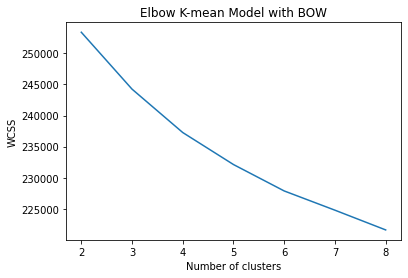

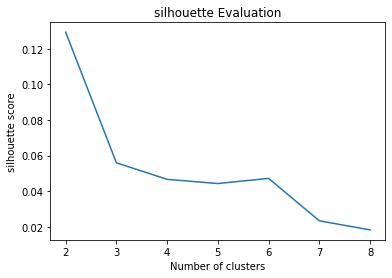

Kappa for the model at n_clusters= 5 is  0.71
Best Value for n cluster is  = 2 The average silhouette_score : 0.1294
For n_clusters = 5 The silhouette_score : 0.045
For n_clusters = 5 The homogeneity_score : 0.7338
For n_clusters = 5 The v_measure_score : 0.8093


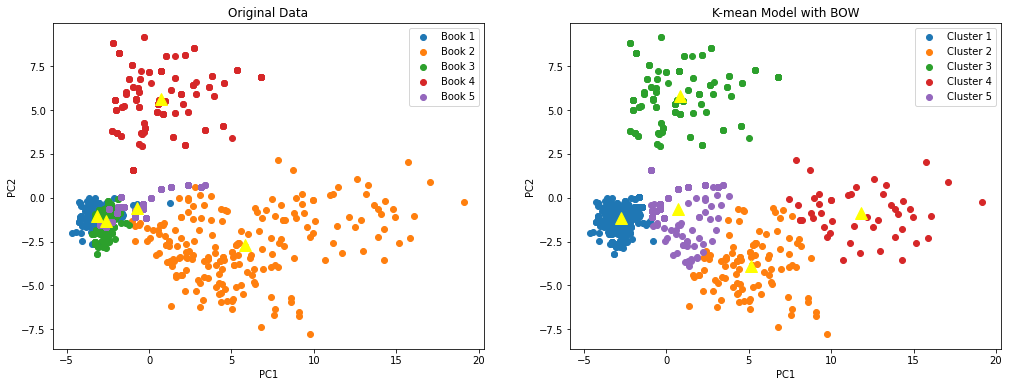

In [ ]:
pred_y,kmeans=Kmeans_and_Evaluation(x_bow,'K-mean Model with BOW')
plot_clusters( x_bow,kmeans,label ,'K-mean Model with BOW')

###TF-IDF

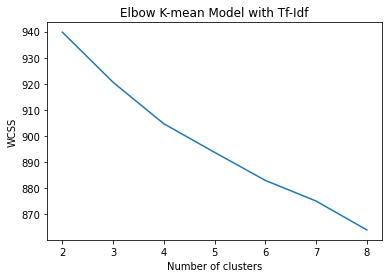

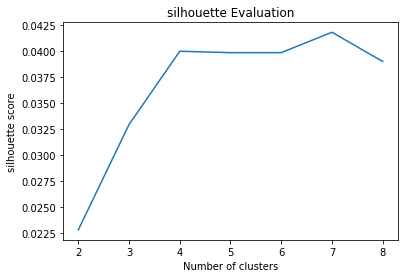

Kappa for the model at n_clusters= 5 is  0.7488
Best Value for n cluster is  = 7 The average silhouette_score : 0.0418
For n_clusters = 5 The silhouette_score : 0.04
For n_clusters = 5 The homogeneity_score : 0.8234
For n_clusters = 5 The v_measure_score : 0.9012


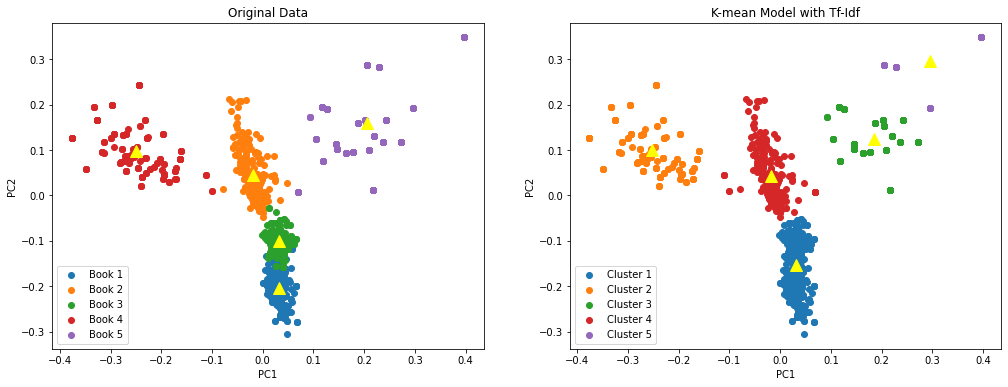

In [ ]:
pred_y_kmeans,kmeans=Kmeans_and_Evaluation(X_tfidf,'K-mean Model with Tf-Idf')
plot_clusters( X_tfidf,kmeans,label ,'K-mean Model with Tf-Idf')

###LDA

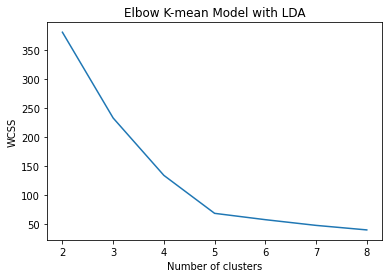

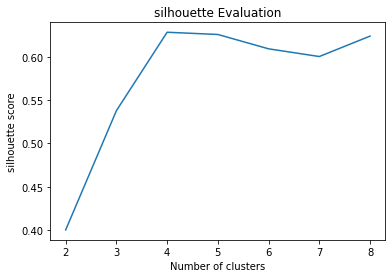

Kappa for the model at n_clusters= 5 is  0.66
Best Value for n cluster is  = 4 The average silhouette_score : 0.6283
For n_clusters = 5 The silhouette_score : 0.6257
For n_clusters = 5 The homogeneity_score : 0.5878
For n_clusters = 5 The v_measure_score : 0.6332


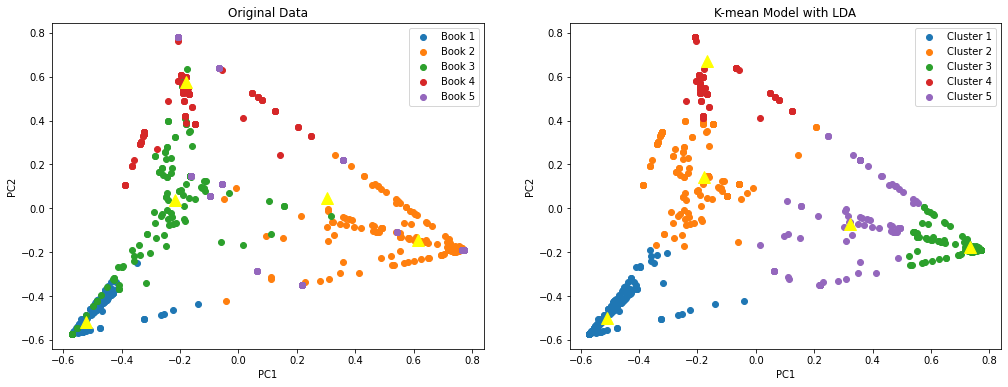

In [ ]:
pred_y,kmeans=Kmeans_and_Evaluation(x_LDA,'K-mean Model with LDA')
plot_clusters( x_LDA,kmeans,label ,'K-mean Model with LDA')

###Word2Vec

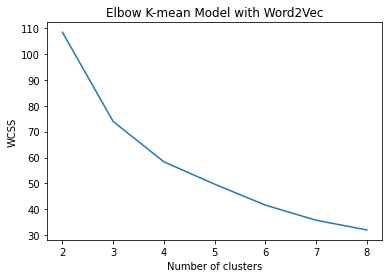

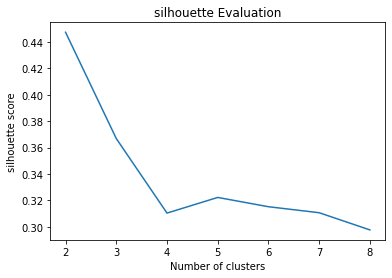

Kappa for the model at n_clusters= 5 is  0.3712
Best Value for n cluster is  = 2 The average silhouette_score : 0.4473
For n_clusters = 5 The silhouette_score : 0.324
For n_clusters = 5 The homogeneity_score : 0.2648
For n_clusters = 5 The v_measure_score : 0.2902


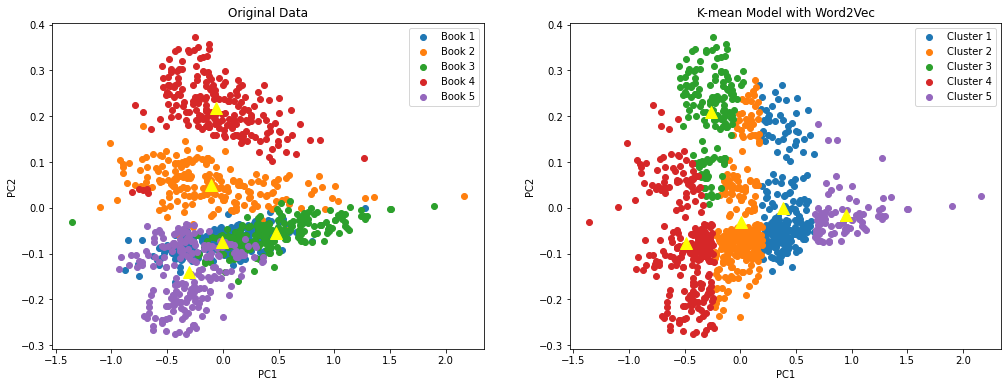

In [ ]:
pred_y,kmeans=Kmeans_and_Evaluation(x_doc2vec,'K-mean Model with Word2Vec')
plot_clusters( x_doc2vec,kmeans,label ,'K-mean Model with Word2Vec')

## Best transformarion with Kmeans Algorithm is Tf-Idf

1.   Kappa for the model at n_clusters= 5 is  0.7488
2.   Best Value for n cluster is  = 7 The average silhouette_score : 0.0418
3.   For n_clusters = 5 The silhouette_score : 0.04
4.   For n_clusters = 5 The homogeneity_score : 0.8234
5.   For n_clusters = 5 The v_measure_score : 0.9012



## EM (Expectation Maximization)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import homogeneity_score
from tqdm import tqdm
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
def EM_model(transformation_,title):
  n_components = np.arange(1, 20)
  models = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(transformation_) for n in n_components]
  plt.plot(n_components, [m.bic(transformation_) for m in models], label='BIC')
  plt.plot(n_components, [m.aic(transformation_) for m in models], label='AIC')
  plt.legend(loc='best')
  plt.xlabel('n_components')
  plt.title(title)
  plt.show()  

  GM = GaussianMixture(n_components=5, covariance_type='spherical', random_state=7)
  GM.fit(transformation_)
  
  y_pred = GM.predict(transformation_)
  #Mapping
  cm = confusion_matrix(label_, y_pred)
  cm_argmax = cm.argmax(axis=0)
  y_pred_ = np.array([cm_argmax[i] for i in y_pred])
  print("Kappa for the EM model at number of Cluster 5 is " , round(cohen_kappa_score(label_,y_pred_),4))
  silhouette_avg = silhouette_score(transformation_,y_pred_)
  print("For n_clusters =", 5,"The average silhouette_score :", round((silhouette_avg),4))
  print("For n_clusters =", 5,"The average homogeneity_score :", round(homogeneity_score(label_,y_pred_),4))
  print("For n_clusters =", 5,"The v_measure_score :", round(v_measure_score(y_pred_, label_),4))

  return y_pred,GM

###BOW

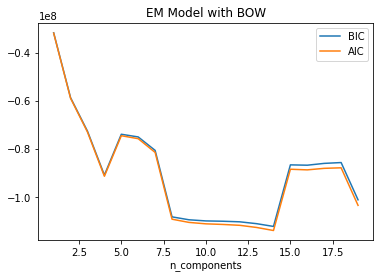

Kappa for the EM model at number of Cluster 5 is  0.725
For n_clusters = 5 The average silhouette_score : 0.0339
For n_clusters = 5 The average homogeneity_score : 0.7348
For n_clusters = 5 The v_measure_score : 0.7941


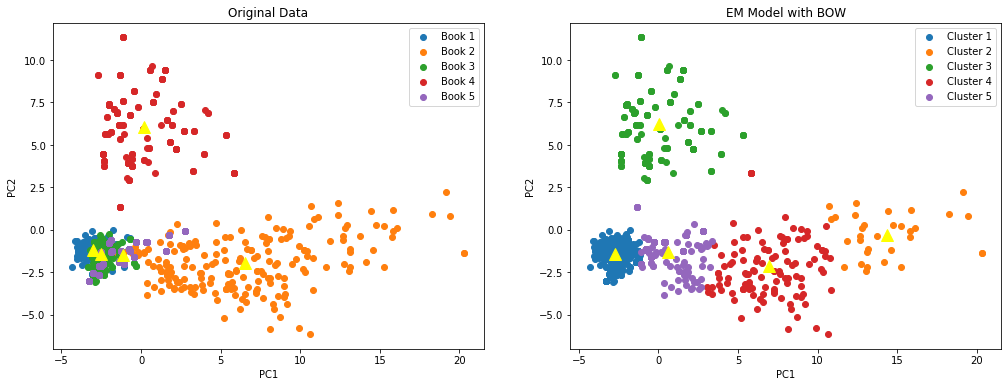

In [ ]:
y_pred, GM =EM_model(x_bow,'EM Model with BOW')
plot_clusters( x_bow, GM,label ,'EM Model with BOW')

###TF-IDF

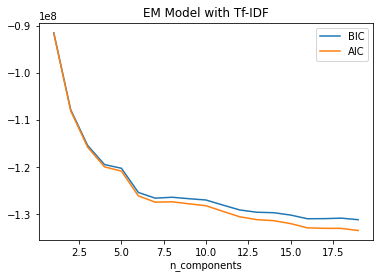

Kappa for the EM model at number of Cluster 5 is  0.7463
For n_clusters = 5 The average silhouette_score : 0.0406
For n_clusters = 5 The average homogeneity_score : 0.8167
For n_clusters = 5 The v_measure_score : 0.8944


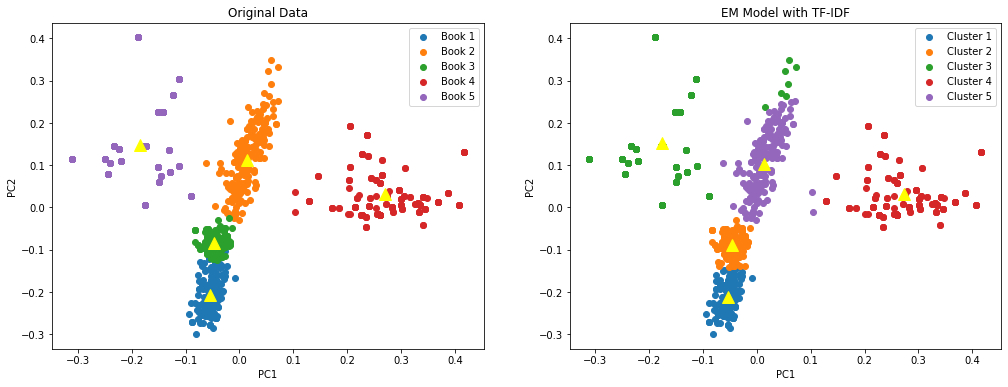

In [ ]:
y_pred_GM, GM =EM_model(X_tfidf,'EM Model with Tf-IDF')
plot_clusters( X_tfidf, GM,label ,'EM Model with TF-IDF')

###LDA

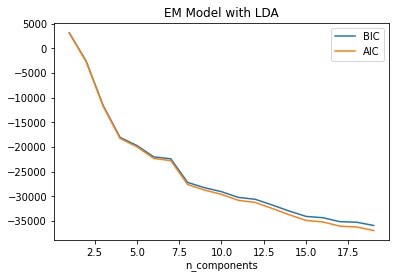

Kappa for the EM model at number of Cluster 5 is  0.305
For n_clusters = 5 The average silhouette_score : 0.1537
For n_clusters = 5 The average homogeneity_score : 0.2492
For n_clusters = 5 The v_measure_score : 0.3033


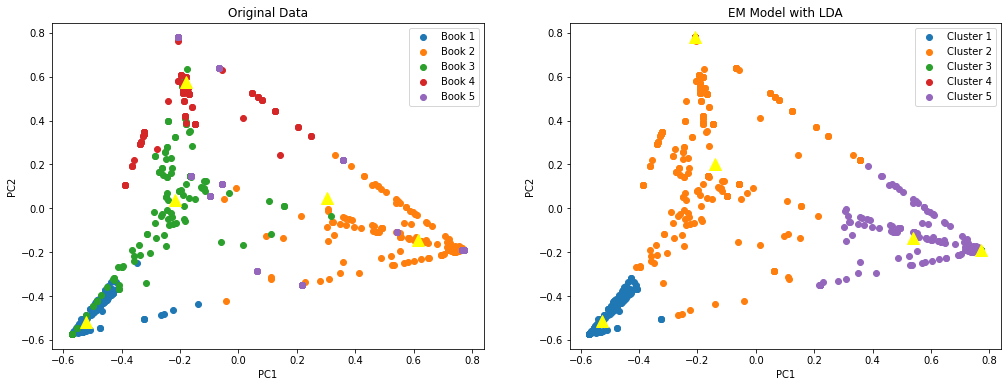

In [ ]:
y_pred, GM =EM_model(x_LDA,'EM Model with LDA')
plot_clusters( x_LDA, GM,label ,'EM Model with LDA')

###Word2Vec

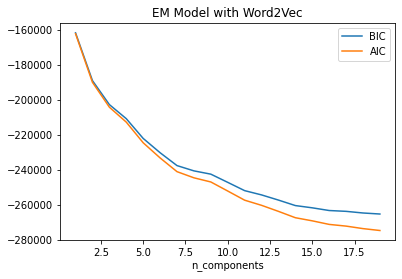

Kappa for the EM model at number of Cluster 5 is  0.37
For n_clusters = 5 The average silhouette_score : 0.3016
For n_clusters = 5 The average homogeneity_score : 0.2629
For n_clusters = 5 The v_measure_score : 0.2903


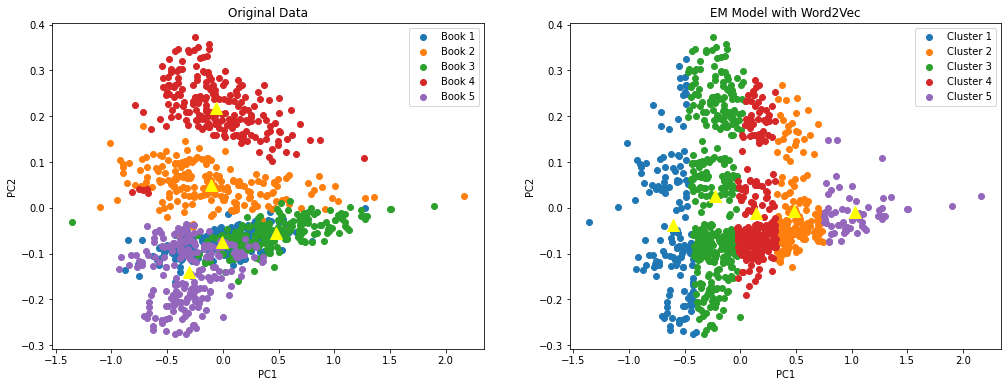

In [ ]:
y_pred, GM =EM_model(x_doc2vec,'EM Model with Word2Vec')
plot_clusters( x_doc2vec, GM,label ,'EM Model with Word2Vec')

## Best transformarion with EM is Tf-Idf
1.     Kappa for the EM model at number of Cluster 5 is  0.7463
2.     For n_clusters = 5 The average silhouette_score : 0 4
3.     For n_clusters = 5 The average homogeneity_score : 0.8167
4.     For n_clusters = 5 The v_measure_score : 0.8944



##  Hierarchy Model

In [ ]:
def dist_matrix(features):
  dist_matrix = euclidean_distances(features, features) 
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')
  return Z_using_dist_matrix  

def draw_dendo(Z_using_dist_matrix):  
  fig = pylab.figure(figsize=(17,12))
  dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [ ]:
def plot_clusters_tsne(transform_model, cluster_model, y, n=5):
    # T-SNE for Transformation model
    tsne_obj = TSNE(n_components=2)
    tsne_model = tsne_obj.fit_transform(transform_model.toarray())
    
    plt.figure(figsize=(17,6))
    
    plt.subplot(1,2,1)
    for clstr in range(n):
        x_points_org = tsne_model[y == clstr, 0]
        y_points_org = tsne_model[y == clstr, 1]
        plt.scatter(x_points_org, y_points_org, label='Book '+str(clstr+1))
        plt.plot(np.mean(x_points_org), np.mean(y_points_org), color='yellow', marker='^', markersize=12)
    
    plt.title("Original Data")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    
    plt.subplot(1,2,2)
    for clstr in range(n):
        x_points = tsne_model[cluster_model.fit_predict(tsne_model) == clstr, 0]
        y_points = tsne_model[cluster_model.fit_predict(tsne_model) == clstr, 1]
        plt.scatter(x_points, y_points, label="Cluster "+str(clstr+1))
        plt.plot(np.mean(x_points), np.mean(y_points), color='yellow', marker='^', markersize=12)
    
    plt.title("Clusters")
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.legend();

In [ ]:
def cluster_count(cluster_model_labels):
  unique, counts = np.unique(cluster_model_labels, return_counts=True)
  print(np.asarray((unique, counts)).T)
  
  plt.figure(figsize=(8,6))
  plt.bar(unique,counts)
  plt.title("Clusters Count")
  plt.xlabel("Cluster")
  plt.ylabel("Count")
  plt.show()

In [ ]:
def scores_cal(transformation_model, clustering_model, y):
  y_pred = clustering_model.fit_predict(transformation_model)
  cm = confusion_matrix(label_, y_pred)
  cm_argmax = cm.argmax(axis=0)
  y_pred_ = np.array([cm_argmax[i] for i in y_pred])
  silhouet = silhouette_score(transformation_model, y_pred_)
  kopo = cohen_kappa_score(label_,y_pred_)
  print("Kappa for the Hierarchy model at number of Cluster 5 is " , cohen_kappa_score(label_,y_pred_))
  print("For n_clusters =", 5," Silhouette Coefficient is:", round(silhouet, 4))
  print("For n_clusters =", 5," The average homogeneity_score :",round(homogeneity_score(label_,y_pred_)))
  print("For n_clusters =", 5,"The v_measure_score :", round(v_measure_score(y_pred_, label_),4))
  


### BOW

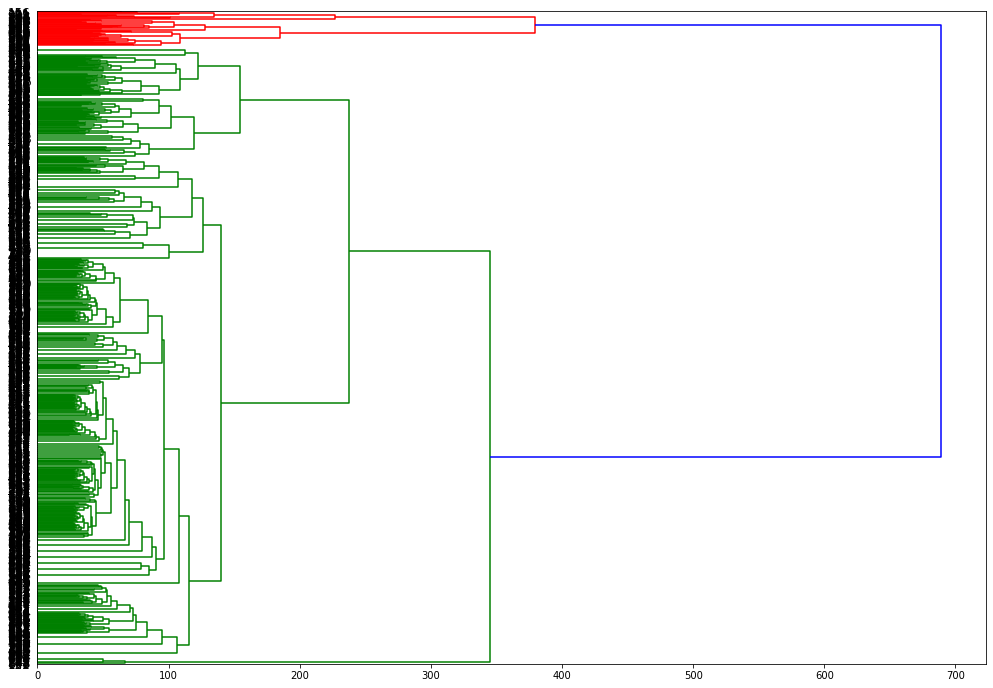

In [ ]:
draw_dendo(dist_matrix(x_bow))

In [ ]:
model_agg_bow = AgglomerativeClustering(n_clusters=5).fit(x_bow)
model_agg_bow

AgglomerativeClustering(n_clusters=5)

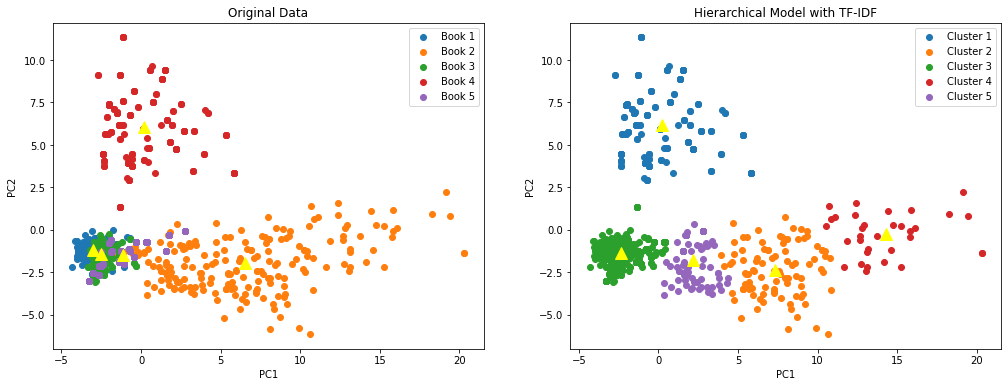

In [ ]:
plot_clusters( x_bow, model_agg_bow,label ,'Hierarchical Model with TF-IDF')

In [ ]:
scores_cal(x_bow,model_agg_bow,label)

Kappa for the Hierarchy model at number of Cluster 5 is  0.6875
For n_clusters = 5  Silhouette Coefficient is: 0.0436
For n_clusters = 5  The average homogeneity_score : 1
For n_clusters = 5 The v_measure_score : 0.7779


### Tf-Idf

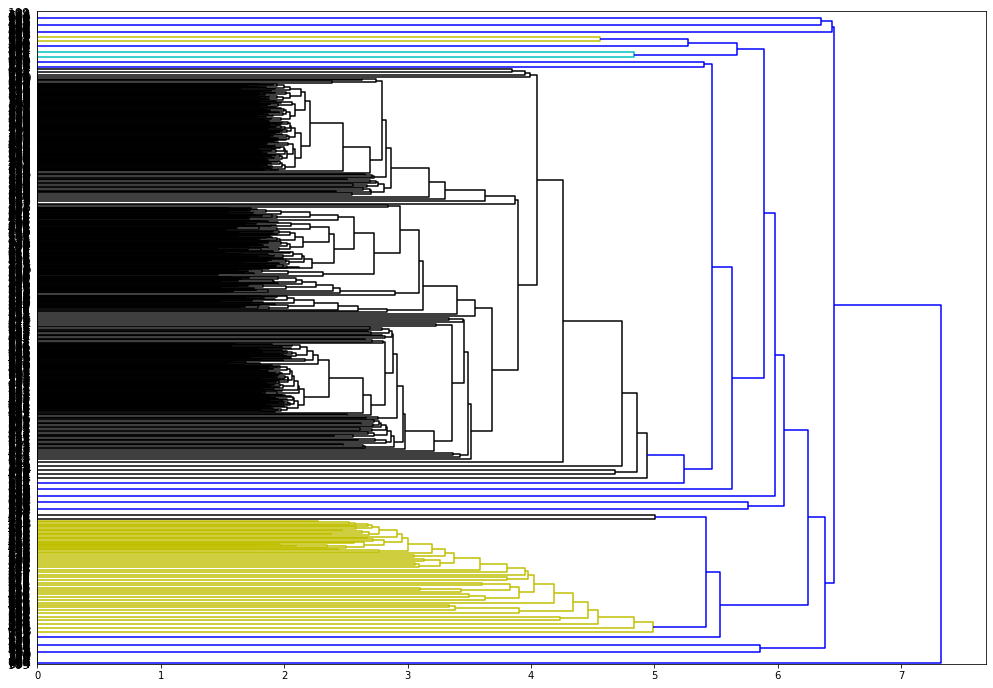

In [ ]:
draw_dendo(dist_matrix(X_tfidf))

In [ ]:
model_agg_tf_idf = AgglomerativeClustering(n_clusters=5).fit(X_tfidf)
model_agg_tf_idf

AgglomerativeClustering(n_clusters=5)

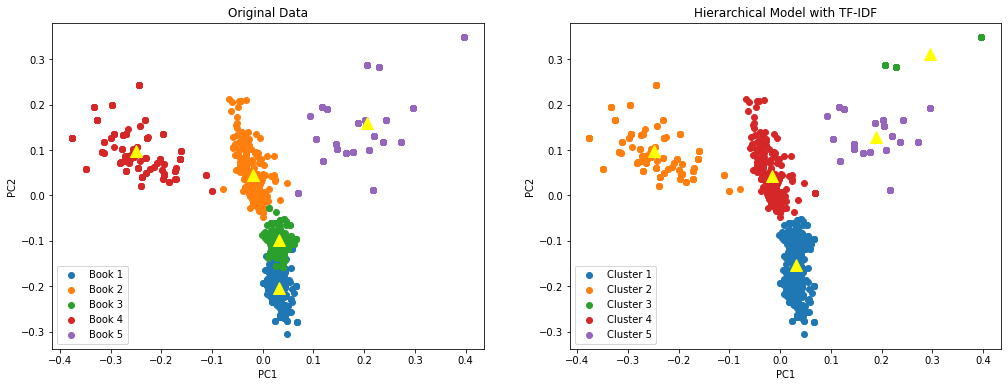

In [ ]:
plot_clusters( X_tfidf, model_agg_tf_idf,label ,'Hierarchical Model with TF-IDF')

In [ ]:
Hierach_pred=scores_cal(X_tfidf,model_agg_tf_idf,label)

Kappa for the Hierarchy model at number of Cluster 5 is  0.73375
For n_clusters = 5  Silhouette Coefficient is: 0.0397
For n_clusters = 5  The average homogeneity_score : 1
For n_clusters = 5 The v_measure_score : 0.8612


### LDA

In [ ]:
x_LDA_sparse=sparse.csr_matrix(x_LDA)

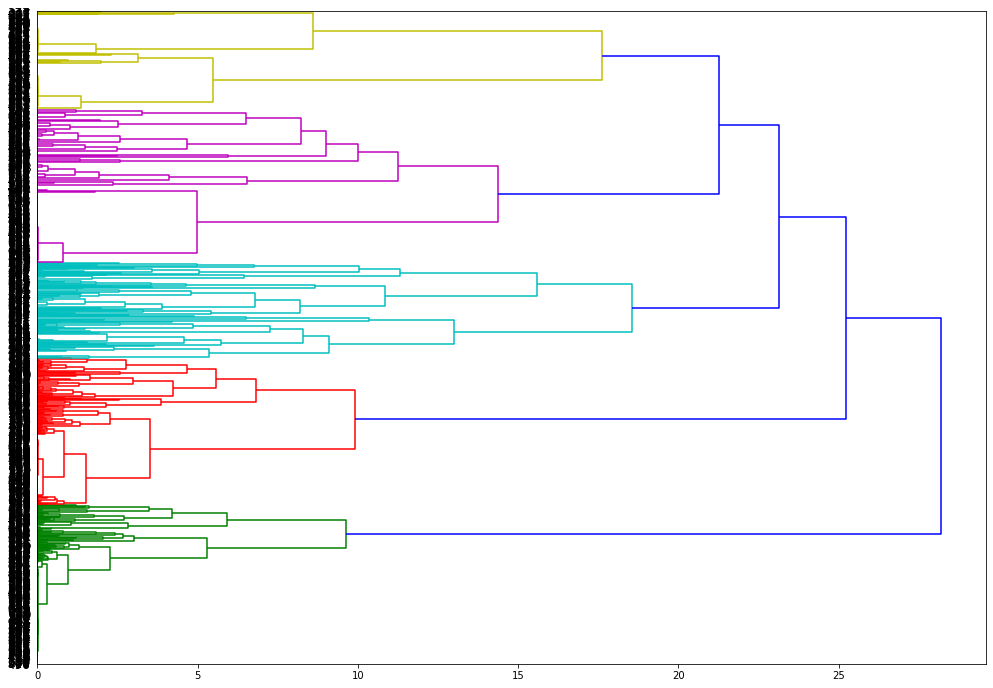

In [ ]:
draw_dendo(dist_matrix(x_LDA_sparse))

In [ ]:
model_agg_LDA = AgglomerativeClustering(n_clusters=5).fit(x_LDA)
model_agg_LDA

AgglomerativeClustering(n_clusters=5)

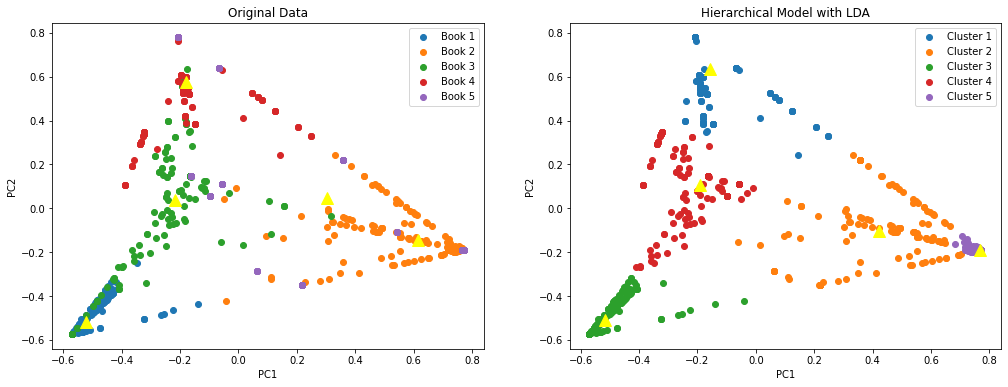

In [ ]:
plot_clusters( x_LDA, model_agg_LDA,label ,'Hierarchical Model with LDA')

In [ ]:
scores_cal(x_LDA,model_agg_LDA,label)

Kappa for the Hierarchy model at number of Cluster 5 is  0.665
For n_clusters = 5  Silhouette Coefficient is: 0.6126
For n_clusters = 5  The average homogeneity_score : 1
For n_clusters = 5 The v_measure_score : 0.6309


### Word Embedding

In [ ]:
d2v_sparse = sparse.csr_matrix(x_doc2vec)

In [ ]:
draw_dendo(dist_matrix(d2v_sparse))

In [ ]:
model_agg_word2vec = AgglomerativeClustering(n_clusters=5).fit(x_doc2vec)
model_agg_word2vec 

In [ ]:
plot_clusters( x_doc2vec, model_agg_word2vec,label ,'Hierarchical Model with word2vec')

In [ ]:
scores_cal(x_doc2vec,model_agg_word2vec,label)

## Best transformarion with Hierachy is Tf-Idf
1.      Kappa for the Hierarchy model at number of Cluster 5 is  0.73375
2.      For n_clusters = 5  Silhouette Coefficient is: 0.0403
3.      For n_clusters = 5  The average homogeneity_score : 1
4.      For n_clusters = 5 The v_measure_score : 0.8693



# Calculate Coherence

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

def Calc_Coherence(texts,n):
  coh_calc=[]
  bst_coh=-1000
  n_topic=2
  for i in range(2,n):
    lsts = []
    for s in texts : 
      lsts.append(s.split(" "))
    texts2 = lsts
    dictionary = Dictionary(texts2)
    corpus = [dictionary.doc2bow(text) for text in texts2]

    goodLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=50, num_topics=n)
    cm_good = CoherenceModel(model=goodLdaModel, corpus=corpus, coherence='u_mass')
    coh_calc.append(cm_good.get_coherence())
    if i==2:
        bst_coh=cm_good.get_coherence()
    else:
        if bst_coh < cm_good.get_coherence():
          bst_coh=cm_good.get_coherence()
          n_topic=i
  lst_rnge=np.arange(2,n)
  plt.plot(lst_rnge, coh_calc, label='Calc_Coherence')
  plt.xlabel('Number of Topic Modeling')
  plt.ylabel('Coherence score')
  plt.title("Coherence Evaluation")
  plt.show()
  print("Best Coherence value is:", bst_coh ," at number of topic modeling is ",n_topic)

  return cm_good.get_coherence()

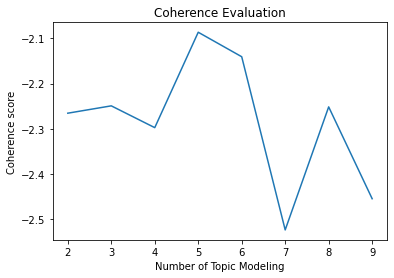

Best Coherence value is: -2.0867787081312628  at number of topic modeling is  5


In [ ]:
coherence=Calc_Coherence(books,10)

# Clustering result that is the closest to the human labels 
##Kmeans Algorithm with Tf-Idf

1.   Kappa for the model at n_clusters= 5 is  0.745
2.   Best Value for n cluster is  = 5 The average silhouette_score : 0.0438
3.   For n_clusters = 5 The silhouette_score : 0.0406
4.   For n_clusters = 5 The homogeneity_score : 0.8138
5.   For n_clusters = 5 The v_measure_score : 0.8913

# Error Analysis 

In [ ]:
def wordCloud(tokens, plot=1):
    lemtz = WordNetLemmatizer()
    lemmatize_keywords = []
    for token in tokens:
        lemmatize_keywords.append(lemtz.lemmatize(token, wordnet.VERB))
    if plot == 1:
        plot_wordcloud(lemmatize_keywords)
    else:
        return ' '.join(lemmatize_keywords)

def plot_wordcloud(text, bg_color='salmon', cmap='rainbow'):
    c = choice(['Paired','Set2','husl','Spectral','coolwarm'])
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    wordcloud = WordCloud(width=3000, height=2000, background_color=bg_color, colormap=cmap,
                     collocations=False, stopwords=stop, random_state=51).generate(' '.join(text))
    ax1.imshow(wordcloud)
    ax1.axis('off')
    labels = pd.Series(data=text).value_counts().index[:20]
    data = pd.Series(data=text).value_counts()[:20]
    sns.barplot(y=labels, x=data, ax=ax2, palette=c)

In [ ]:
def plot_wordcloudC(text, bg_color='salmon', cmap='rainbow'):
    c = choice(['Paired','Set2','husl','Spectral','coolwarm'])
    d = {}
    for a, x in text.values:
      d[x] = a
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    wordcloud = WordCloud(width=3000, height=2000, background_color=bg_color, colormap=cmap,
                     collocations=False, random_state=51).generate_from_frequencies(frequencies=d)
                     
    ax1.imshow(wordcloud)
    ax1.axis('off')
    labels = pd.Series(data=text.Words)[:10]
    data = pd.Series(data=text.word_freq)[:10]
    sns.barplot(y=labels, x=data, ax=ax2, palette=c)

##Champion Model

In [ ]:
pred_y_kmeanss,kmeans=Kmeans_and_Evaluation(X_tfidf,'K-mean Model with Tf-Idf')
plot_clusters( X_tfidf,kmeans,label ,'K-mean Model with Tf-Idf')

In [ ]:
df_clusters = booksPartions_df.copy()

In [ ]:
df_clusters['Kmeans_TF_IDF'] = pred_y_kmeans

In [ ]:
df_clusters['label'] = df_clusters.Label.map({0:'a', 1:'b', 2:'c', 3:'d', 4:'e'})

Text(0.5, 1.0, 'Kmeans_TF-IDF')

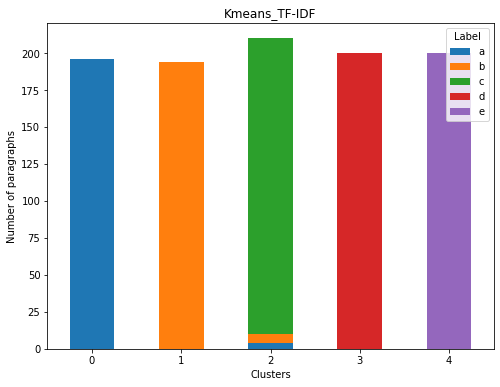

In [ ]:
pd.crosstab(df_clusters['Kmeans_TF_IDF'], df_clusters.Label).plot.bar(figsize=(8,6),stacked=True, rot=0);
plt.xlabel('Clusters')
plt.ylabel('Number of paragraphs')
plt.title('Kmeans_TF-IDF')

##TF_IDF

### Number of labels paragraph in each cluster

[[  0 196]
 [  1 194]
 [  2 210]
 [  3 200]
 [  4 200]]


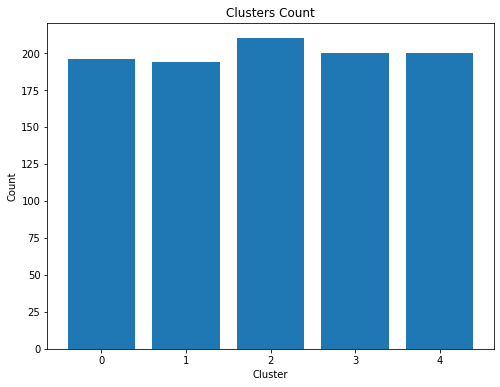

In [ ]:
cluster_count(pred_y_kmeans)

Cluster 2 caught more data than other clusters

In [ ]:
X_tfidf_with_cluster=X_tfidf.copy()

In [ ]:
X_tfidf_with_cluster['Cluster'] = pred_y_kmeans

In [ ]:
X_tfidf_with_cluster

,_accepted_,_adair_,_alone_,_and_,_any_,_at_,_be_,_broke_,_cause_,_compassion_,...,zilpah,zion,ziphion,zippor,zoan,zohar,zorah,zuar,zurishaddai,Cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [ ]:
df_clusters.Label.groupby(df_clusters['Kmeans_TF_IDF']).count()

Kmeans_TF_IDF
0    196
1    194
2    210
3    200
4    200
Name: Label, dtype: int64

In [ ]:
pd.crosstab(df_clusters['Kmeans_TF_IDF'], df_clusters.Label)

Label,a,b,c,d,e
Kmeans_TF_IDF,,,,,
0,196,0,0,0,0
1,0,194,0,0,0
2,4,6,200,0,0
3,0,0,0,200,0
4,0,0,0,0,200


Text(0, 0.5, 'Number of paragraphs')

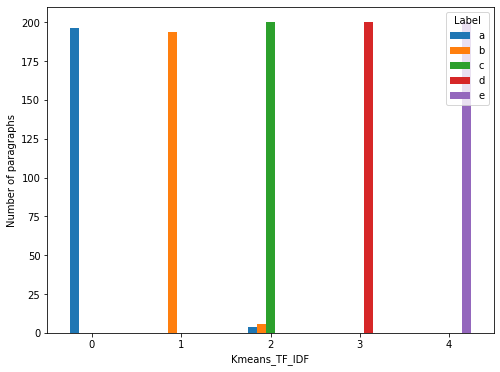

In [ ]:
pd.crosstab(df_clusters['Kmeans_TF_IDF'], df_clusters.Label).plot.bar(figsize=(8,6), rot=0);
plt.ylabel("Number of paragraphs")

### Most frequent words in each cluster

#### cluster0

In [ ]:
X_tfidf_with_cluster

,_accepted_,_adair_,_alone_,_and_,_any_,_at_,_be_,_broke_,_cause_,_compassion_,...,zilpah,zion,ziphion,zippor,zoan,zohar,zorah,zuar,zurishaddai,Cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [ ]:
word_frequencies_by_cluster = X_tfidf_with_cluster.groupby('Cluster').sum()

In [ ]:
# To get sorted list for a numbered cluster
df0 = pd.DataFrame(word_frequencies_by_cluster.iloc[0,:].sort_values(0, ascending = False))
df0

,0
emma,18.233063
miss,12.436194
would,12.079241
harriet,11.659534
weston,10.593390
...,...
hatred,0.000000
hats,0.000000
hatted,0.000000
hatter,0.000000


In [ ]:
df0['Words'] = df0.index
df0.rename(columns = {0:'word_freq'}, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0

,word_freq,Words
0,18.233063,emma
1,12.436194,miss
2,12.079241,would
3,11.659534,harriet
4,10.593390,weston
...,...,...
12313,0.000000,hatred
12314,0.000000,hats
12315,0.000000,hatted
12316,0.000000,hatter


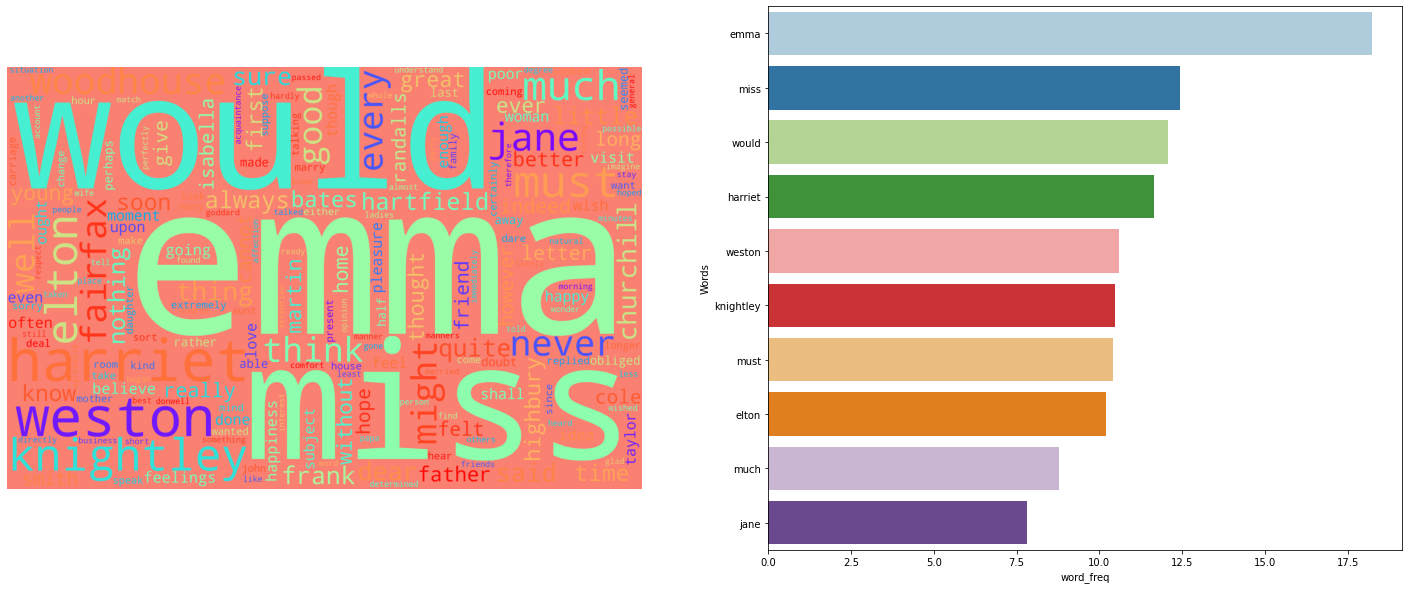

In [ ]:
plot_wordcloudC(df0)

#### Cluster1

In [ ]:
# To get sorted list for a numbered cluster
df1 = pd.DataFrame(word_frequencies_by_cluster.iloc[1,:].sort_values(0, ascending = False))
df1

,1
unto,26.506424
lord,24.107254
shall,21.029456
thou,13.995123
israel,10.479593
...,...
greatcoat,0.000000
greatness,0.000000
greatnesse,0.000000
greefe,0.000000


In [ ]:
df1['Words'] = df1.index
df1.rename(columns = {1:'word_freq'}, inplace = True)
df1.reset_index(drop=True, inplace=True)
df1

,word_freq,Words
0,26.506424,unto
1,24.107254,lord
2,21.029456,shall
3,13.995123,thou
4,10.479593,israel
...,...,...
12313,0.000000,greatcoat
12314,0.000000,greatness
12315,0.000000,greatnesse
12316,0.000000,greefe


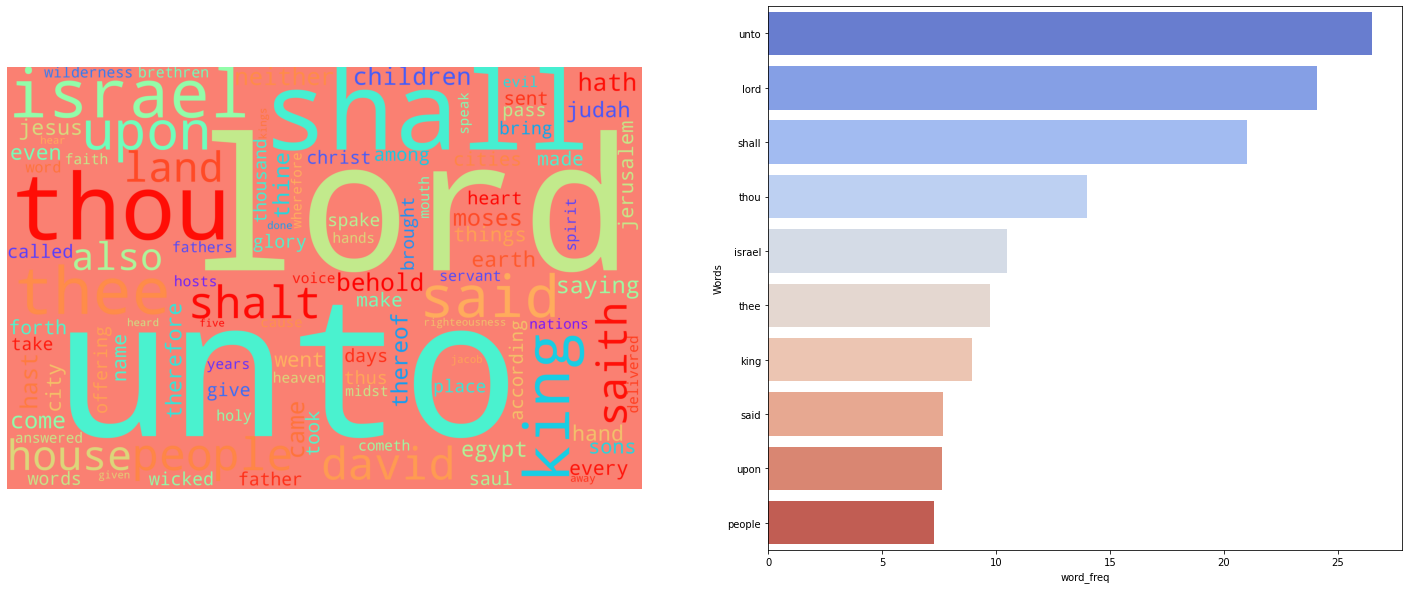

In [ ]:
plot_wordcloudC(df1[:100])

#### Cluster2

In [ ]:
# To get sorted list for a numbered cluster
df2 = pd.DataFrame(word_frequencies_by_cluster.iloc[2,:].sort_values(0, ascending = False))
df2

,2
brown,12.302770
like,9.891546
said,9.731789
flambeau,7.272611
father,6.900820
...,...
philosophy,0.000000
entertaine,0.000000
philistines,0.000000
philistine,0.000000


In [ ]:
df2['Words'] = df2.index
df2.rename(columns = {2:'word_freq'}, inplace = True)
df2.reset_index(drop=True, inplace=True)
df2

,word_freq,Words
0,12.302770,brown
1,9.891546,like
2,9.731789,said
3,7.272611,flambeau
4,6.900820,father
...,...,...
12313,0.000000,philosophy
12314,0.000000,entertaine
12315,0.000000,philistines
12316,0.000000,philistine


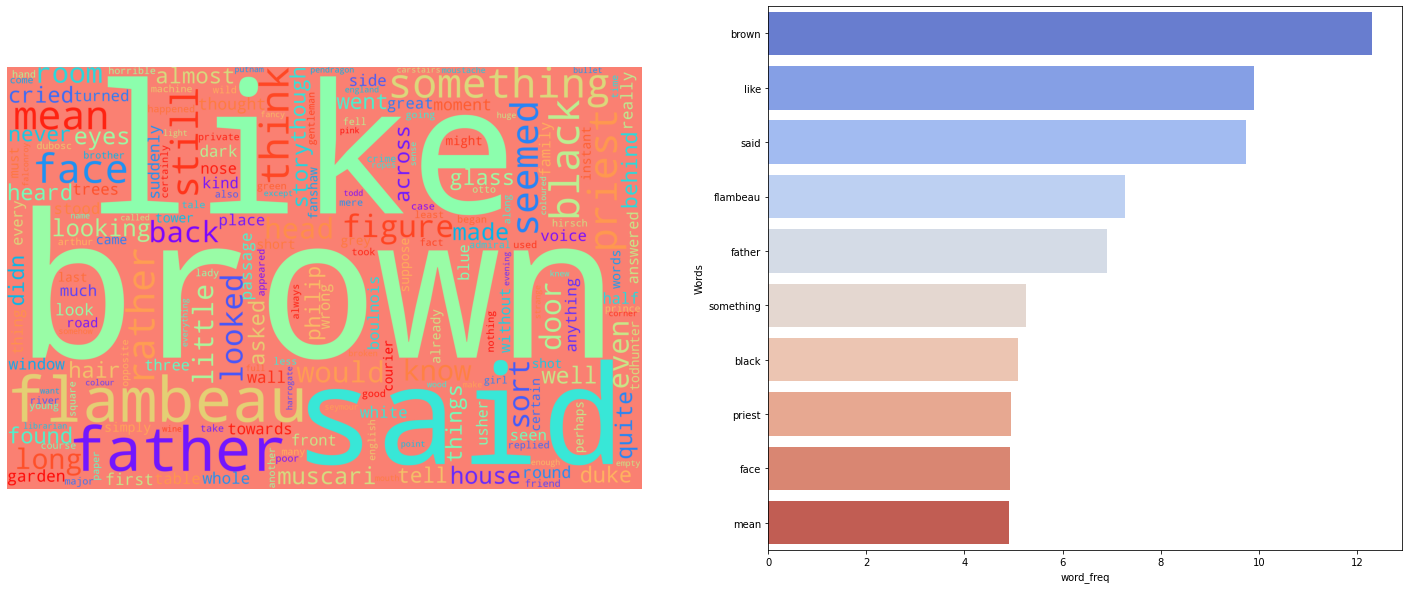

In [ ]:
plot_wordcloudC(df2)

#### Cluster3

In [ ]:
# To get sorted list for a numbered cluster
df3 = pd.DataFrame(word_frequencies_by_cluster.iloc[3,:].sort_values(0, ascending = False))
df3

,3
caesar,26.589467
brutus,20.771001
haue,18.686161
cassi,16.761804
cassius,12.870834
...,...
fulfilled,0.000000
fulham,0.000000
fullest,0.000000
fullness,0.000000


In [ ]:
df3['Words'] = df3.index
df3.rename(columns = {3:'word_freq'}, inplace = True)
df3.reset_index(drop=True, inplace=True)
df3

,word_freq,Words
0,26.589467,caesar
1,20.771001,brutus
2,18.686161,haue
3,16.761804,cassi
4,12.870834,cassius
...,...,...
12313,0.000000,fulfilled
12314,0.000000,fulham
12315,0.000000,fullest
12316,0.000000,fullness


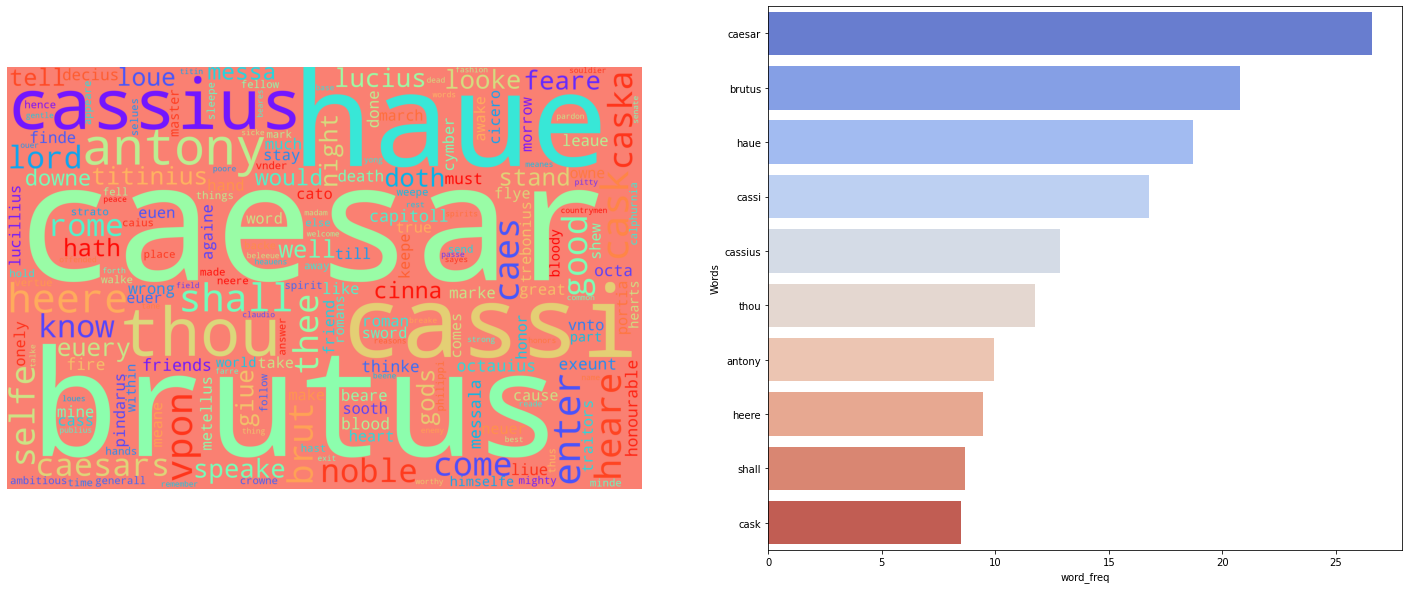

In [ ]:
plot_wordcloudC(df3)

#### Cluster4

In [ ]:
# To get sorted list for a numbered cluster
df4 = pd.DataFrame(word_frequencies_by_cluster.iloc[4,:].sort_values(0, ascending = False))
df4

,4
weep,12.153468
little,11.230576
thou,10.948309
love,10.792630
thee,10.493045
...,...
flat,0.000000
flattered,0.000000
flatterer,0.000000
flatterers,0.000000


In [ ]:
df4['Words'] = df4.index
df4.rename(columns = {4:'word_freq'}, inplace = True)
df4.reset_index(drop=True, inplace=True)
df4

,word_freq,Words
0,12.153468,weep
1,11.230576,little
2,10.948309,thou
3,10.792630,love
4,10.493045,thee
...,...,...
12313,0.000000,flat
12314,0.000000,flattered
12315,0.000000,flatterer
12316,0.000000,flatterers


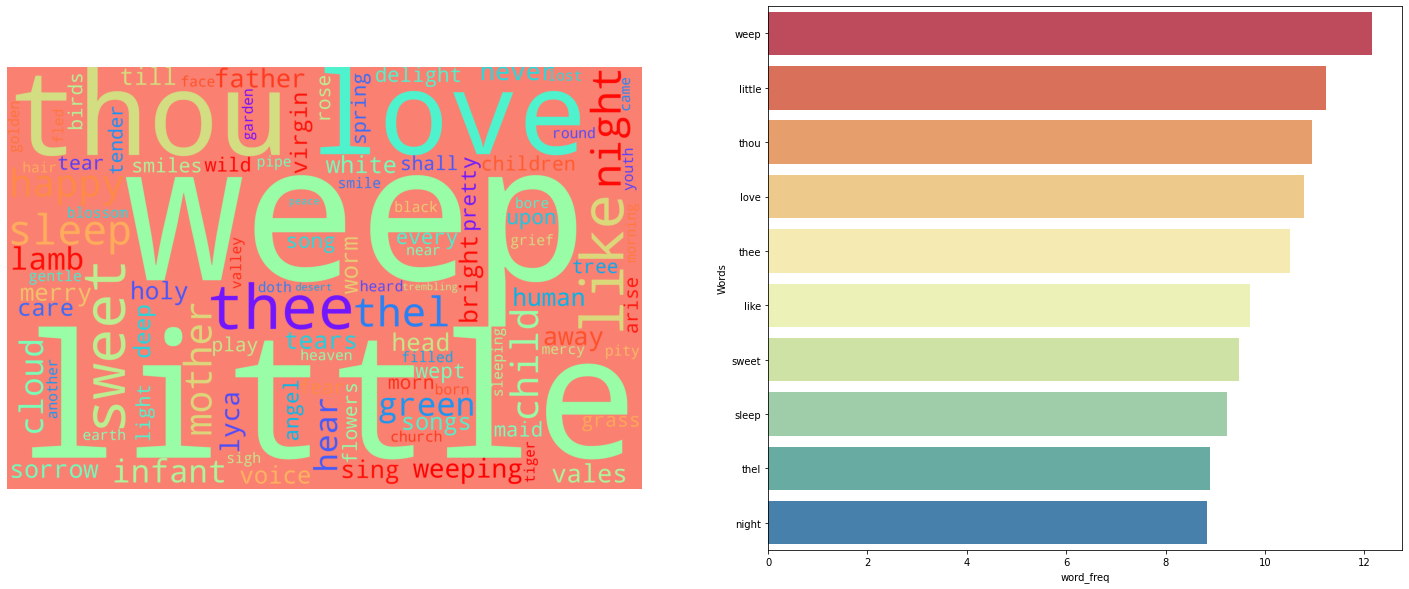

In [ ]:
plot_wordcloudC(df4[:100])